<a href="https://colab.research.google.com/github/Priyesh29sri/Machine-Learning-/blob/main/Music_Recommendation_System_(K_means_clusturing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [6]:
data = {
    'Song_ID': [1, 2, 3, 4, 5, 6, 7, 8],
    'Song_Name': ['Song A', 'Song B', 'Song C', 'Song D', 'Song E', 'Song F', 'Song G', 'Song H'],
    'Artist_Name': ['Artist X', 'Artist Y', 'Artist Z', 'Artist W', 'Artist X', 'Artist Y', 'Artist Z', 'Artist W'],
    'Genre': ['Pop', 'Rock', 'Jazz', 'Classical', 'Pop', 'Rock', 'Electronic', 'Classical'],
    'Tempo': [120, 140, 100, 80, 125, 150, 128, 90],
    'Energy': [0.8, 0.9, 0.6, 0.3, 0.7, 0.9, 0.85, 0.4],
    'Popularity': [85, 90, 70, 65, 78, 88, 92, 60]
}
df = pd.DataFrame(data)

file_path = 'music_data.csv'
df.to_csv(file_path, index=False)

df.head()

,Song_ID,Song_Name,Artist_Name,Genre,Tempo,Energy,Popularity
0,1,Song A,Artist X,Pop,120,0.8,85
1,2,Song B,Artist Y,Rock,140,0.9,90
2,3,Song C,Artist Z,Jazz,100,0.6,70
3,4,Song D,Artist W,Classical,80,0.3,65
4,5,Song E,Artist X,Pop,125,0.7,78


In [10]:
X = df[['Tempo', 'Energy', 'Popularity']]
y = df['Genre']
print("Features:\n " , X)
print("Target(labels): \n", y)

Features:
     Tempo  Energy  Popularity
0    120    0.80          85
1    140    0.90          90
2    100    0.60          70
3     80    0.30          65
4    125    0.70          78
5    150    0.90          88
6    128    0.85          92
7     90    0.40          60
Target(labels): 
 0           Pop
1          Rock
2          Jazz
3     Classical
4           Pop
5          Rock
6    Electronic
7     Classical
Name: Genre, dtype: object


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

print("Traning Features: \n", X_train)
print("Training Labels: \n", y_train )

Traning Features: 
    Tempo  Energy  Popularity
7     90    0.40          60
2    100    0.60          70
4    125    0.70          78
3     80    0.30          65
6    128    0.85          92
Training Labels: 
 7     Classical
2          Jazz
4           Pop
3     Classical
6    Electronic
Name: Genre, dtype: object


In [13]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
print("KNN model trained sucecssfully")

KNN model trained sucecssfully


In [17]:
y_pred = knn.predict(X_test)

print("Predictions: \n", y_pred)
print("Actual Labels: \n", y_test.values)

Predictions: 
 ['Electronic' 'Electronic' 'Electronic']
Actual Labels: 
 ['Rock' 'Rock' 'Pop']


In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:2f}%")

Model Accuracy: 0.000000%


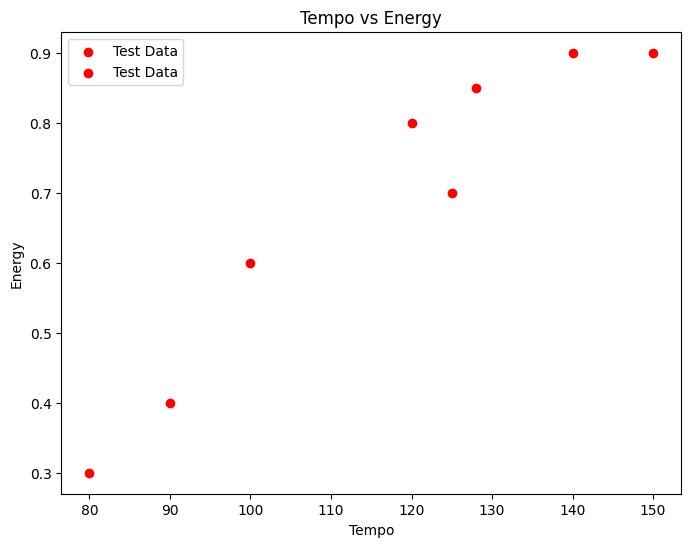

In [19]:
plt.figure(figsize=(8,6))

plt.scatter(X_train['Tempo'],X_train['Energy'],c='red',label= 'Test Data')

plt.scatter(X_test['Tempo'], X_test['Energy'], c='red', label= 'Test Data')

plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.title('Tempo vs Energy')
plt.legend()
plt.show()

In [20]:
new_song = [[130,0.75,80]]
predicted_genre = knn.predict(new_song)
print(f"The predicted genre for the new song is: {predicted_genre[0]}")

The predicted genre for the new song is: Electronic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


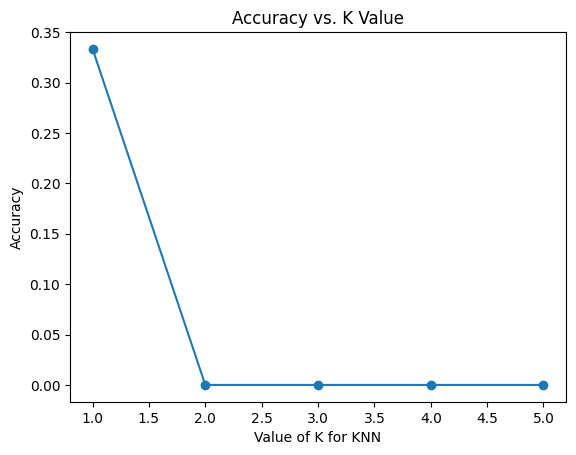

In [27]:
accuracies = []
for k in range (1,6):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))


plt.plot(range(1,6), accuracies, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value')
plt.show()